In [1]:
import networkx as nx
from pathlib import Path
import random
from networkx.algorithms.flow import preflow_push
import time
from algo.fifo_push_relabel import fifo_push_relabel_impl
import matplotlib.pyplot as plt

def get_input(file):
    p = file.readline()
    while p:
        params = tuple(map(int, p.split()))
        yield params
        p = file.readline()


t = 0
n_t = []
m_t = []
u_t = []

In [2]:
INPUT_PARAMS_PATH = Path("./datasets/analyze/input_params.txt")
with INPUT_PARAMS_PATH.open('r') as file:
    for params in get_input(file):
        g = nx.gnm_random_graph(params[0], params[1])
        for edge in g.edges():
            cap = random.randint(1, params[2])
            g[edge[0]][edge[1]]['capacity'] = cap
        r = preflow_push(nx.Graph(g), 0, params[0]-1, value_only=True)
        expected_result = r.graph["flow_value"]
        gr = nx.Graph(g)
        start_time=time.perf_counter()
        result = fifo_push_relabel_impl(gr,0,params[0]-1)
        finish_time=time.perf_counter()
        n_t.append((params[0], finish_time-start_time))
        m_t.append((params[1], finish_time-start_time))
        u_t.append((params[2], finish_time-start_time))
        t = max(finish_time-start_time,t)
        assert expected_result == result

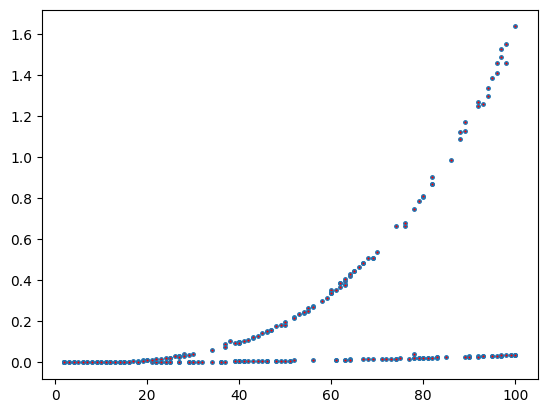

1.635152166999994


In [8]:
plt.plot([n[0] for n in n_t], [n[1] for n in n_t],linestyle='',marker='.',markersize=5,
     markerfacecolor='#FF0000')
plt.show()
print(t)

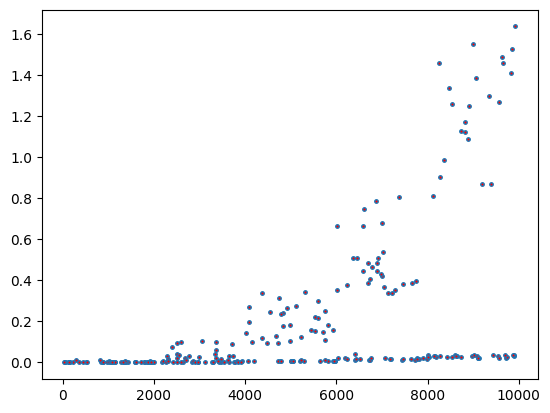

1.635152166999994


In [9]:
plt.plot([n[0] for n in m_t], [n[1] for n in m_t],linestyle='',marker='.',markersize=5,
     markerfacecolor='#FF0000')
plt.show()
print(t)

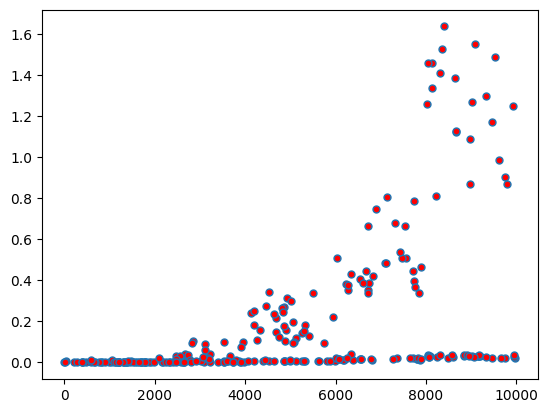

1.635152166999994


In [7]:
plt.plot([n[0] for n in u_t], [n[1] for n in u_t],linestyle='',marker='.',markersize=5,
     markerfacecolor='#FF0000')
plt.show()
print(t)